# INTERATIVIDADE#

In [1]:
using Interact
using Reactive

## ELEMENTOS BASICOS##

** BOTÃO**

** Botão básico**

In [2]:
botao = button("Aperte Aqui")

display(botao)

foldp((acc, value) -> acc + 1, 0, signal(botao))

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Aperte Aqui",nothing)

0

<strong>Botão de Opção</strong>

In [8]:
botoes = togglebuttons([("Soma", +), ("Subtração", -), ("Multiplicação", *)])

display(botoes)

Interact.Options{:ToggleButtons,Function}(Signal{Function}(+, nactions=0),"",+,"Soma",Interact.OptionDict(Any["Soma","Subtração","Multiplicação"],Dict{Any,Any}("Soma"=>+,"Multiplicação"=>*,"Subtração"=>-)),Any[],Any[])

In [9]:
map(g -> g(2, 5), signal(botoes))

7

**Botão radio**

In [10]:
radiob = radiobuttons(Dict("Soma" => +, "Subtração" => -, "Multiplicação" => *))

Interact.Options{:RadioButtons,Function}(Signal{Function}(+, nactions=0),"",+,"Soma",Interact.OptionDict(Any["Soma","Multiplicação","Subtração"],Dict{Any,Any}("Soma"=>+,"Multiplicação"=>*,"Subtração"=>-)),Any[],Any[])

In [11]:
map(g -> g(5, 2), signal(radiob))

7

** SLIDES**

In [12]:
# Slider

barra = slider(1:10,label="Numeros:")

display(barra)

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"Numeros:",5,1:10,true)

In [13]:
valor= map(x -> x*x, signal(barra))

49

** CHECKBOX**

In [27]:
cb = (checkbox(false))

Interact.Checkbox(Signal{Bool}(false, nactions=0),"",false)

In [30]:
ck = map(x -> x, signal(cb))

false

** DROPDOWN**

In [20]:
lista = dropdown(["Julia", "Sage", "Python"])

display(lista)

signal(lista)

Interact.Options{:Dropdown,ASCIIString}(Signal{ASCIIString}(Julia, nactions=0),"","Julia","Julia",Interact.OptionDict(Any["Julia","Sage","Python"],Dict{Any,Any}("Sage"=>"Sage","Julia"=>"Julia","Python"=>"Python")),Any[],Any[])

"Julia"

In [21]:
drop= map(x -> x, signal(lista))

"Python"

**CAIXA DE TEXTO**

** TextoBox**

In [31]:
caixa_texto = textbox("1")

Interact.Textbox{UTF8String}(Signal{UTF8String}(1, nactions=0),"",nothing,"1")

In [32]:
texto_numero = textbox(0.0, range=0.0:10.0)

Interact.Textbox{Float64}(Signal{Float64}(0.0, nactions=0),"",0.0:1.0:10.0,0.0)

In [33]:
h(x) = x^2

map(x -> h(x), (signal(texto_numero)))

100.0

** Area texto**

In [48]:
texto = textarea("Micro editor de  \$\\LaTeX\$")

Interact.Textarea{ASCIIString}(Signal{ASCIIString}(Micro editor de  $\LaTeX$, nactions=0),"","Micro editor de  \$\\LaTeX\$")

In [17]:
map(latex, signal(texto))

Interact.Latex("","Micro editor de  \$\\LaTeX\$")

## FUNÇÃO MANIPULATE##

A macro @manipulate permite manipulação de qualquer expressão usando widgets. Podemos, por exemplo, usar um slide e um botão para cronstruir diferentes tipos de gráficos

**Gráfico**

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"Grau",5,0:10,true)

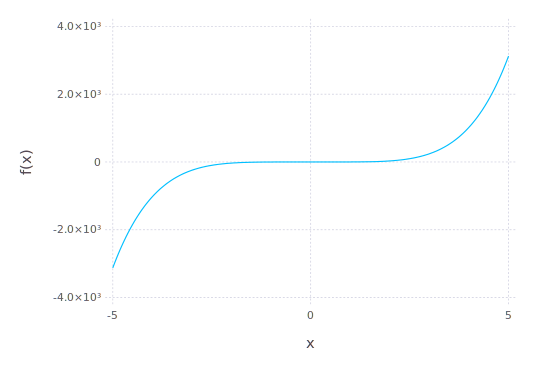

In [34]:
using Gadfly

@manipulate for Grau=0:10
    Gadfly.plot(x -> x^Grau,-5,5)
end

In [35]:
using SymPy
x = Sym("x")

@manipulate for n=0:20
    latex(SymPy.diff(sin(x)*x, x, n))
end

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"n",10,0:20,true)

Interact.Latex("","\$\$- x \\sin{\\left (x \\right )} + 10 \\cos{\\left (x \\right )}\$\$")

<strong>Animação</strong>

Interact.Options{:ToggleButtons,ASCIIString}(Signal{ASCIIString}(red, nactions=0),"color","red","red",Interact.OptionDict(Any["red","blue","black"],Dict{Any,Any}("blue"=>"blue","black"=>"black","red"=>"red")),Any[],Any[])

Interact.Slider{Int64}(Signal{Int64}(11, nactions=0),"n",11,3:20,true)

0.0

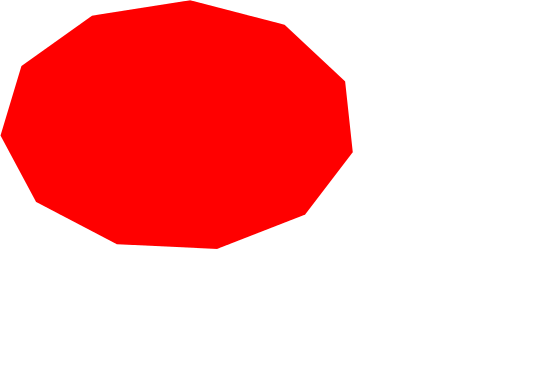

In [36]:
using Colors
using Compose

@manipulate for color=["red", "blue", "black"], n=3:20, ticks=fps(5.0)
    t = time()
    Compose.compose(context(), fill(parse(Colorant, color)),polygon([((1+sin(w+t))/3, (1+cos(w+t))/3) for w in 0:2pi/n:2*pi]))
end

In [38]:
using Interact, Reactive

timer = togglebutton("Ligar tempo")
reset = button("resetar", value = :reset)
map(display, [timer,reset])

dt = 0.1
sig = merge(filterwhen(signal(timer), 0, every(float(dt))), signal(reset))
foldl((acc,val) -> val == :reset ? 0 : acc + dt, 0., sig)

Interact.ToggleButton(Signal{Bool}(false, nactions=0),"Ligar tempo",false)

Interact.Button{Symbol}(Signal{Symbol}(reset, nactions=0),"resetar",:reset)

0.0